# Density Estimation and Histograms

Density estimation is a central topic in statistical research, particularly when estimating the Probability Density Function (PDF). Among various methods, we'll focus on the simplest: **histograms**.

## Assumptions for Histograms

For simplicity, we consider:

- $X_i \in [0, 1]$, meaning $p(x)$ is nonzero only within this interval.
- $p(x)$ is smooth, and its derivative is bounded: $|p'(x)| \leq L$ for all $x$. (L-Lipschitz continuous)

Histograms partition the interval $[0, 1]$ into bins, using the count within each bin as a density estimate.

## Bin Partitioning

With $M$ bins, the interval $[0, 1]$ is partitioned as follows:

- $B_1 = [0, \frac{1}{M})$
- $B_2 = [\frac{1}{M}, \frac{2}{M})$
- ...
- $B_{M-1} = [\frac{M-2}{M}, \frac{M-1}{M})$
- $B_M = [\frac{M-1}{M}, 1]$

For a point $x$ in bin $B_l$, the density estimate is:

$$ \hat{p}_M(x) = \frac{\text{number of observations within } B_l}{n \times \text{length of the bin}} = \frac{M}{n} \sum_{i=1}^n I(X_i \in B_l) $$

This assumes equal density value to all points within a bin.

## Theoretical Insights

### Mean Squared Error (MSE)

The MSE of an estimator $\hat{\theta}$ for estimating a parameter $\theta$ is a measure of the estimator's accuracy, capturing both its bias and variance. Mathematically, the MSE is defined as:

$$ \text{MSE}(\hat{\theta}) = E\left[\left(\hat{\theta} - \theta\right)^2\right] $$

This expression for MSE can be decomposed into bias and variance components as follows:

### Decomposition of MSE

1. **Bias** of an estimator is the difference between the expected value of the estimator and the true value of the parameter it is estimating. Formally, it is defined as:

$$ \text{Bias}(\hat{\theta}) = E[\hat{\theta}] - \theta $$

2. **Variance** reflects the spread of the estimator's sampling distribution. The variance of an estimator is:

$$ \text{Var}(\hat{\theta}) = E\left[\left(\hat{\theta} - E[\hat{\theta}]\right)^2\right] $$

By expanding the MSE and rearranging terms, we can express the MSE in terms of bias and variance:

$$ \text{MSE}(\hat{\theta}) = E\left[\left(\hat{\theta} - E[\hat{\theta}] + E[\hat{\theta}] - \theta\right)^2\right] $$

Expanding this expression yields:

$$ \text{MSE}(\hat{\theta}) = E\left[\left(\hat{\theta} - E[\hat{\theta}]\right)^2\right] + 2E\left[\left(\hat{\theta} - E[\hat{\theta}]\right)\left(E[\hat{\theta}] - \theta\right)\right] + E\left[\left(E[\hat{\theta}] - \theta\right)^2\right] $$

The second term in this expansion, due to the properties of expectation, becomes zero because $E[\hat{\theta} - E[\hat{\theta}]] = 0$. Therefore, the MSE simplifies to:

$$ \text{MSE}(\hat{\theta}) = \text{Var}(\hat{\theta}) + \text{Bias}^2(\hat{\theta}) $$

### Applying to Histogram Density Estimation

For the histogram density estimator $\hat{p}_M(x)$ for a given point $x$, the MSE can be similarly decomposed:

$$ \text{MSE}(\hat{p}_M(x)) = \text{Var}(\hat{p}_M(x)) + \text{Bias}^2(\hat{p}_M(x)) $$

Where:

- $\text{Bias}(\hat{p}_M(x)) = E[\hat{p}_M(x)] - p(x)$
- $\text{Var}(\hat{p}_M(x)) = E\left[\left(\hat{p}_M(x) - E[\hat{p}_M(x)]\right)^2\right]$

The expressions for bias and variance of $\hat{p}_M(x)$ have been previously detailed, showing how they depend on the properties of the true density function $p(x)$, the number of bins $M$, and the sample size $n$. This decomposition highlights that reducing MSE involves balancing the trade-off between bias and variance, a fundamental concept in statistical estimation and machine learning.
The bias and variance of a histogram-based density estimator, $\hat{p}_M(x)$, can be derived through mathematical equations that consider the properties of the true density function $p(x)$ and the structure of the histogram. Here's a detailed breakdown of how to calculate both:

### Bias of $\hat{p}_M(x)$

The bias of the estimator $\hat{p}_M(x)$ is defined as the difference between the expected value of the estimator and the true value of the density function at a point $x$. Mathematically, it's expressed as:

$$ \text{Bias}(\hat{p}_M(x)) = E[\hat{p}_M(x)] - p(x) $$

Given a bin $B_l$ that contains $x$, the expected value of $\hat{p}_M(x)$ over this bin is calculated as:

1. **Expected Value of $\hat{p}_M(x)$**:

$$ E[\hat{p}_M(x)] = E[\frac{M}{n} \sum_{i=1}^n I(X_i \in B_l)] = \frac{M}{n} \sum_{i=1}^n E[I(X_i \in B_l)] = \frac{M}{n} nP(X_i \in B_l) $$
$$ =  M \cdot P(X_i \in B_l) = M \int_{\frac{l-1}{M}}^{\frac{l}{M}} p(u) du $$

This integral represents the probability of a random variable falling within bin $B_l$, scaled by $M$, the number of bins.

2. **Approximation Using the Mean Value Theorem**:

By the mean value theorem, there exists a point $x^*$ within $[\frac{l-1}{M}, \frac{l}{M}]$ such that:

$$ E[\hat{p}_M(x)] = p(x^*) $$

Hence, the bias can be approximated as:

$$ \text{Bias}(\hat{p}_M(x)) = p(x^*) - p(x) $$

And by using the derivative and the mean value theorem again, we can express the bias in terms of the derivative of $p(x)$ at some point $x^{**}$:

$$ \text{Bias}(\hat{p}_M(x)) = p'(x^{**}) \cdot (x^* - x) $$

Given the bounded derivative condition $|p'(x)| \leq L$, the maximum possible bias is:

$$ |\text{Bias}(\hat{p}_M(x))| \leq \frac{L}{M} $$


### Variance of $\hat{p}_M(x)$

The variance of the density estimator $\hat{p}_M(x)$ measures how much the estimates vary around their expected value for a given bin. It's crucial for understanding the reliability of the density estimates across different samples.

#### Step 1: Basic Expression

The variance of $\hat{p}_M(x)$ is initially defined as:

$$ \text{Var}(\hat{p}_M(x)) = M^2 \cdot \text{Var}\left(\frac{1}{n} \sum_{i=1}^n I(X_i \in B_l)\right) $$

This equation captures the variance of the proportion of observations within a specific bin $B_l$, scaled up by the square of the number of bins $M^2$, to reflect the variance of the density estimate itself.

#### Step 2: Binomial Variance

Given $I(X_i \in B_l)$ is a binary indicator, its variance within a bin can be represented using the binomial distribution formula:

$$ \text{Var}\left(\frac{1}{n} \sum_{i=1}^n I(X_i \in B_l)\right) = \frac{P(X_i \in B_l)(1 - P(X_i \in B_l))}{n} $$

Here, $P(X_i \in B_l)$ is the probability of a single observation falling within the bin $B_l$.

#### Step 3: Relating to the Density Function

By relating the probability $P(X_i \in B_l)$ to the density function $p(x)$, and recognizing that $P(X_i \in B_l) = \frac{p(x^*)}{M}$ (with $x^*$ being a representative point within the bin as per the Mean Value Theorem), the variance expression can be further refined:

$$ \text{Var}(\hat{p}_M(x)) = M^2 \cdot \frac{p(x^*)/M \cdot (1 - p(x^*)/M)}{n} $$

#### Step 4: Simplification

Simplifying this expression gives us:

$$ \text{Var}(\hat{p}_M(x)) = \frac{M \cdot p(x^*)}{n} + \frac{p^2(x^*)}{n} $$

This formula indicates the variance of the density estimate $\hat{p}_M(x)$ in terms of the density at $x^*$, the number of bins $M$, and the sample size $n$.

#### Interpretation

The variance depends on:

- The density $p(x^*)$ at the representative point $x^*$: Higher densities lead to higher variance since there's more fluctuation in counts.
- The number of bins $M$: More bins mean a smaller size for each bin, which can increase variance because the estimates become more sensitive to where points fall within the range $[0,1]$.
- The sample size $n$: Larger sample sizes reduce variance by providing more data points, leading to more stable estimates across bins.

#### Upper Bound

The upper bound of the variance is given for practical purposes to estimate the maximum expected variance under the worst-case scenario, assuming $p(x^*) \leq p_{\text{max}}$:

$$ \text{Var}(\hat{p}_M(x)) \leq \frac{M \cdot p_{\text{max}}}{n} + \frac{p^2_{\text{max}}}{n} $$

This upper bound helps in understanding the maximum variability one might expect from the histogram estimator under the given conditions.

### Bias-Variance Trade-off
- **Bias**: Given a uniformly bounded derivative of $p(x)$, the bias of $\hat{p}_M(x)$ is $\leq \frac{L}{M}$.
    - **Bias decreases by increasing space ($M$)!**. 
- **Variance**: The variance of $\hat{p}_M(x)$ is $\leq M \cdot \frac{p_{\text{max}}}{n} + \frac{p_{\text{max}}^2}{n}$.
    - **Variance increases by increasing space $M$**
- Increasing the number of bins reduces bias but increases variance.
    - Increase #bins -> Less bias, More variance -> Undersmoothing
    - Decrease #bins -> More bias, less variance -> Oversmoothing
- The optimal number of bins ($M_{\text{opt}}$) minimizes the Mean Squared Error (MSE), leading to $M_{\text{opt}} = \left( \frac{n \cdot L^2}{p_{\text{max}}} \right)^{1/3}$.

### Practical Considerations
- **Variance**: Difference between the predicated value and expected predicated value. Captures how repeatable experiments are. e.g. Assume you divide your dataset randomly into two partitions, and you build a histogram for each of them. If you have a histogram with a single bin, it is likely that those two histogram will not have much differences. If you have a histogram with 10000 bins, it is likely that the two histogram will look differently (spikes occurring at different bins).
- **Bias**: Difference between the expected predicated value and the true value. Captures how good your model (e.g. histogram with 100 bins) is to your problem. e.g. A histogram with 1 bin cannot fit your data but a histogram with 100 bins can fit your data.

- The optimal number of bins ($M_{\text{opt}}$) depends on unknown quantities $L$ and $p_{\text{max}}$.
- Selecting $M$ relates to bandwidth selection, a key research area in statistics.

# Conclusion (IMPORTANT)
- **Bias**: Given a uniformly bounded derivative of $p(x)$, the bias of $\hat{p}_M(x)$ is $\leq \frac{L}{M}$.
    - **Bias decreases by increasing space ($M$)!**. 
- **Variance**: The variance of $\hat{p}_M(x)$ is $\leq M \cdot \frac{p_{\text{max}}}{n} + \frac{p_{\text{max}}^2}{n}$.
    - **Variance increases by increasing space $M$**


<img src="images/bias_variance_histogram.png" alt="Bias and Variance in Histograms">

source: "All of Nonparametric Statistics (https://link.springer.com/book/10.1007/0-387-30623-4)"

<img src="images/bias_variance.png" alt="Bias and Variance">


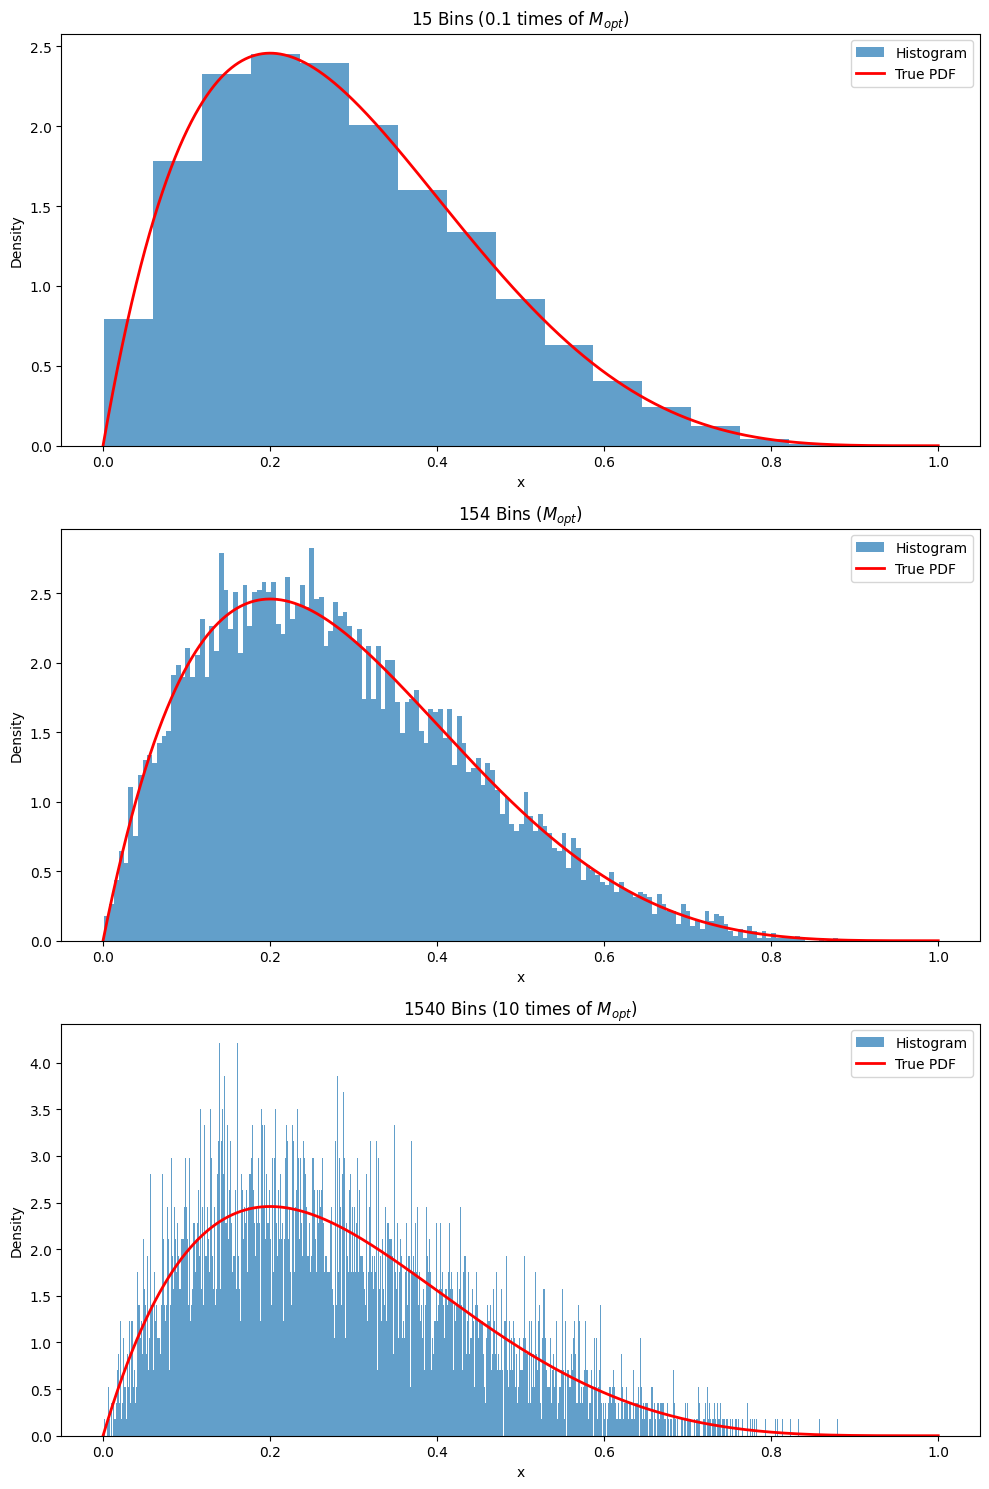

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.optimize import minimize_scalar

# Parameters for the Beta distribution
alpha, beta_param = 2, 5
n = 10000  # Sample size

# L derived from the Beta distribution \alpha and \beta parameters
L = 30

# Generate a sample from the Beta distribution
sample = beta.rvs(alpha, beta_param, size=n)

# Approximate p_max by evaluating the PDF over a fine grid
x = np.linspace(0, 1, 10000)
p_max = np.max(beta.pdf(x, alpha, beta_param))

# Simplified approach to calculate M_opt
# Since L is not directly used here, we focus on the influence of p_max and n
M_opt = int(np.cbrt((L**2 * n) / p_max))  # Cubic root of (n/p_max) as a simplified rule
# Define numbers of bins for comparison
bins_small = M_opt // 10
bins_large = M_opt * 10

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Titles for subplots
titles = [f'{bins_small} Bins (0.1 times of $M_{{opt}}$)',
          f'{M_opt} Bins ($M_{{opt}}$)',
          f'{bins_large} Bins (10 times of $M_{{opt}}$)']

# Bins configurations for plotting
bins_configs = [bins_small, M_opt, bins_large]

for ax, bins, title in zip(axs, bins_configs, titles):
    # Plotting the histogram for the given number of bins
    ax.hist(sample, bins=bins, density=True, alpha=0.7, label='Histogram')
    # Plotting the true Beta distribution
    ax.plot(x, beta.pdf(x, alpha, beta_param), 'r-', lw=2, label='True PDF')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

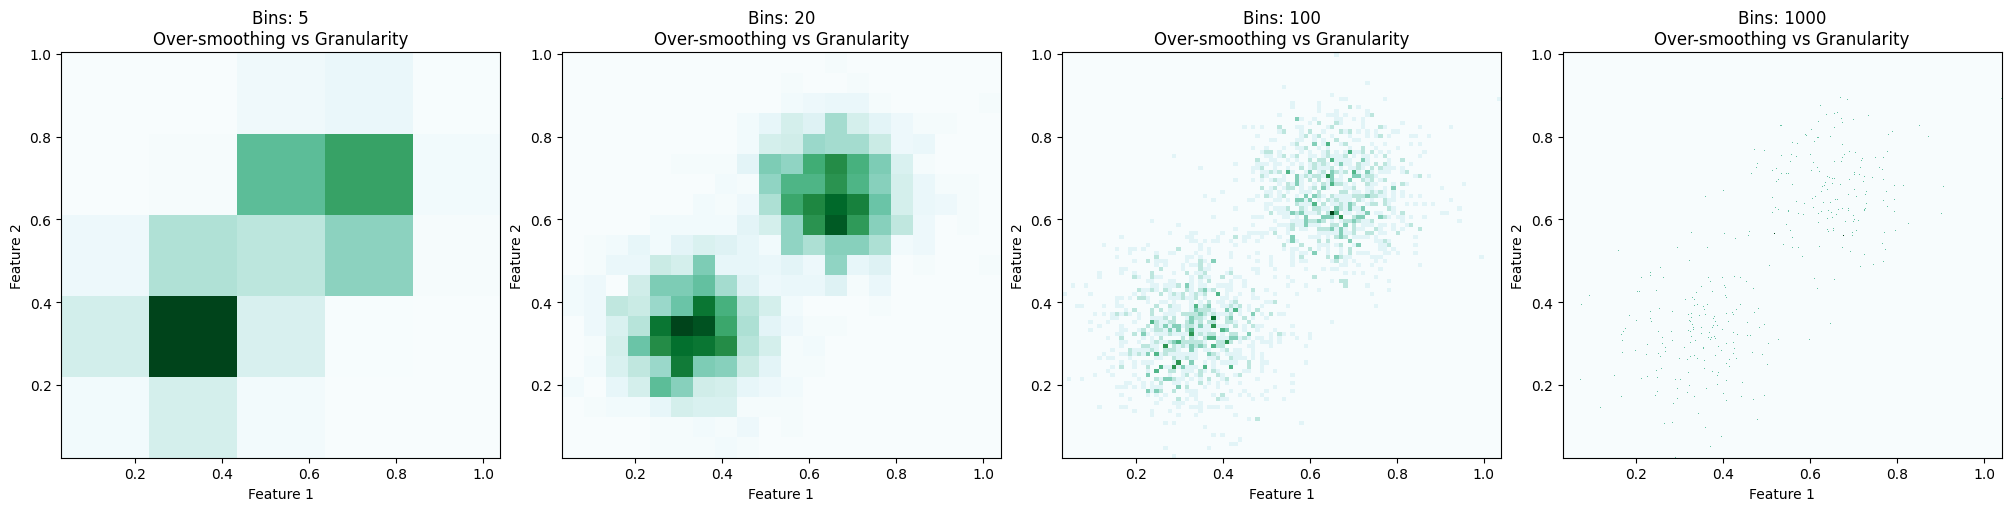

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data: a mixture of two Gaussians
np.random.seed(0)
data1 = np.random.normal(loc=0.33, scale=0.1, size=(1000, 2))
data2 = np.random.normal(loc=0.66, scale=0.1, size=(1000, 2))
data = np.vstack((data1, data2))

# Define different bin sizes to illustrate the trade-off
bin_sizes = [5, 20, 100, 1000]

# Create histograms with varying bin sizes
fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)
for ax, bins in zip(axs, bin_sizes):
    counts, xedges, yedges, image = ax.hist2d(data[:, 0], data[:, 1], bins=bins, cmap=plt.cm.BuGn)
    ax.set_title(f'Bins: {bins}\nOver-smoothing vs Granularity')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
plt.show()

We generate a simple 2D dataset that consists of points from two Gaussian distributions to create a scenario where there are clearly two clusters in the data.
We create histograms with four different bin sizes to show how the choice of bin size affects the visibility of these clusters in the histogram representation.
For small numbers of bins, the histogram might merge the two clusters, leading to over-smoothing where the distinct groups are not visible.
For a large number of bins, many bins will have very few or no points, leading to excessive granularity where the overall structure (the two clusters) might be obscured by the noise of too many empty or sparsely populated bins.

The argument about under-smoothing and over-smoothing in the context of histogram density estimation indeed applies to data of any dimensionality, including one-dimensional datasets. The choice of bin width (or bin size) critically affects the appearance and interpretability of a histogram, with too narrow bins leading to a noisy, over-detailed representation (under-smoothed), and too wide bins resulting in a too-smooth representation that may obscure important features of the data distribution (over-smoothed). Let's clarify how high dimensionality amplifies these issues and introduces unique challenges compared to lower-dimensional cases.

### Under-smoothing and Over-smoothing in Low Dimensions

- **1D Example**: In a one-dimensional histogram, the bin width directly controls the level of detail in the density estimation. A good choice of bin width can reveal important characteristics of the distribution, such as multimodality or skewness. The effects of under-smoothing and over-smoothing are directly observable and relatively straightforward to manage by adjusting the bin width based on data characteristics or using rules of thumb (e.g., Freedman-Diaconis rule).
  
- **Low-dimensional Flexibility**: In one or two dimensions, it's easier to visually assess the histogram and adjust the binning strategy accordingly to achieve an optimal balance between smoothing and detail. The impact of bin width on the interpretability of the histogram is immediate and can be corrected through iteration.

### The Impact of High Dimensionality

- **Exponential Increase in Complexity**: As dimensionality increases, the data space expands exponentially. This expansion dramatically increases the number of possible bins for a given bin width, leading to a combinatorial explosion in the number of bins as you try to maintain the same level of granularity as in lower dimensions.

- **Sparsity and Empty Bins**: High-dimensional data are inherently sparse due to the curse of dimensionality. This means that as you increase the number of bins to capture detail (avoiding over-smoothing), you end up with a vast majority of bins being empty or nearly empty, which makes the histogram a poor tool for visualizing or understanding the data distribution.

- **Loss of Intuitive Control**: In one or two dimensions, adjusting bin width to control smoothing is intuitive and directly observable. In high dimensions, however, you cannot easily visualize the histogram or directly assess the impact of bin width on the representation of the data distribution. The concept of "optimal" bin width becomes harder to define and apply because the direct relationship between bin width and the interpretability of the histogram is lost in the multidimensional space.

- **Dimensionality versus Observability**: Even if you could compute a high-dimensional histogram, observing and interpreting it becomes impractical. The process of choosing bin widths to balance under-smoothing and over-smoothing relies on observability and interpretability, which are compromised in high-dimensional spaces.

### Conclusion

While the fundamental trade-off between under-smoothing and over-smoothing exists in data of any dimensionality, high dimensionality exacerbates the issue by introducing practical challenges related to data sparsity, computational complexity, and the loss of direct observability. In high-dimensional spaces, the simple act of choosing an appropriate bin width becomes entangled with these challenges, making traditional histogram-based approaches to density estimation less viable. Consequently, alternative techniques, such as dimensionality reduction or sophisticated density estimation methods that account for the peculiarities of high-dimensional data, become necessary.

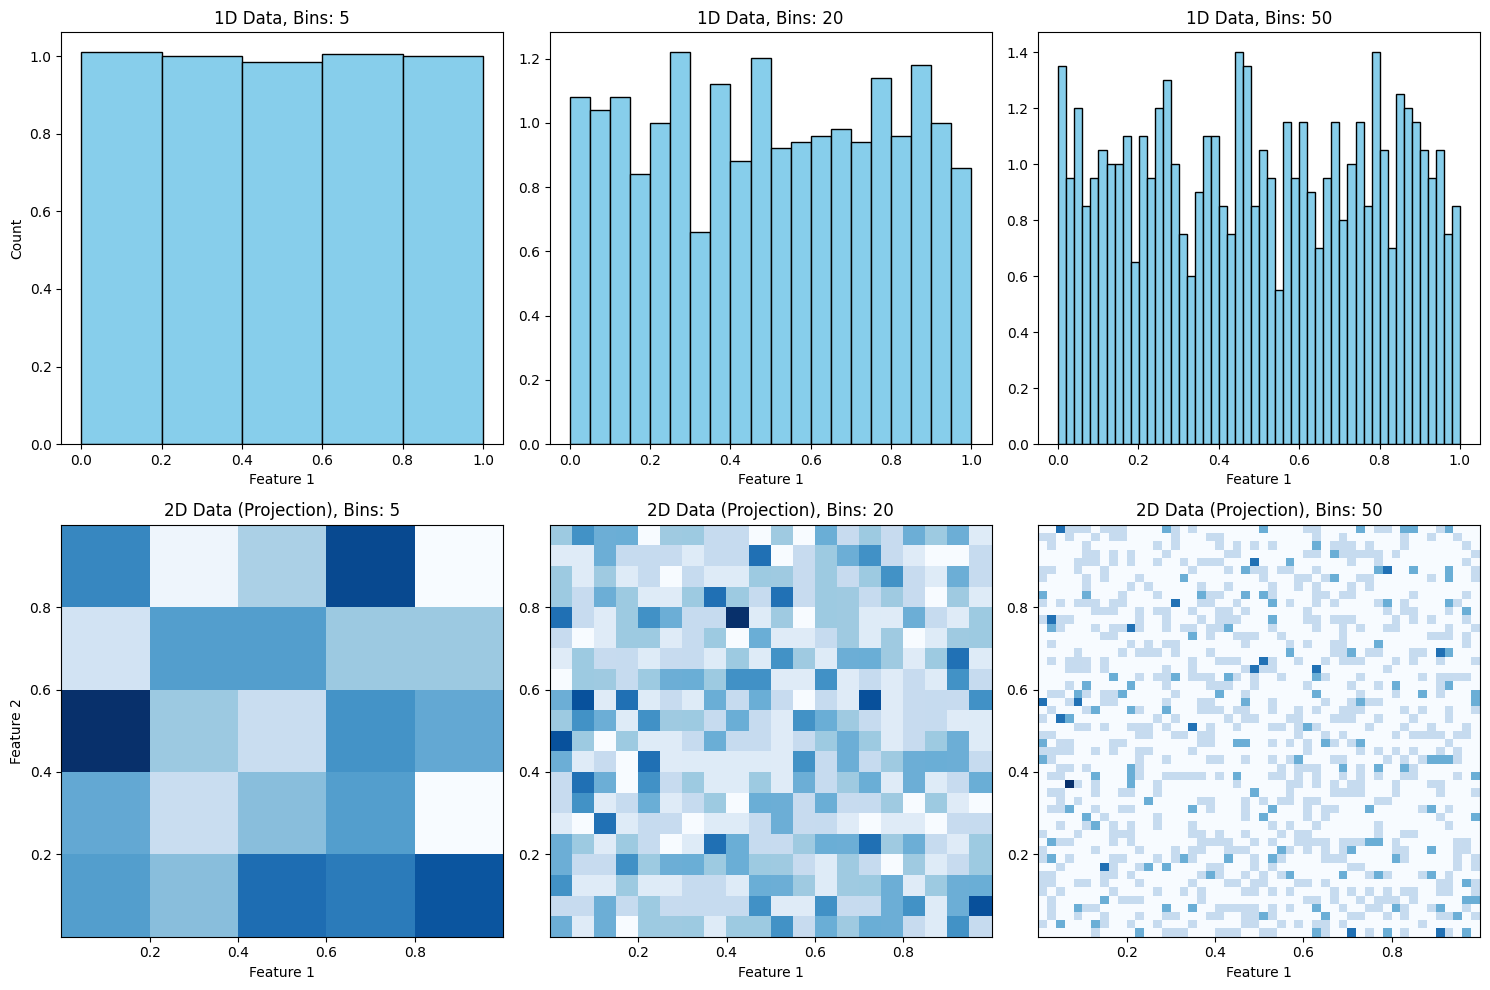

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms_for_dimensions(dimensions, points=1000, bin_sizes=[5, 20, 50]):
    fig, axs = plt.subplots(len(dimensions), len(bin_sizes), figsize=(15, len(dimensions) * 5))
    
    for i, dim in enumerate(dimensions):
        # Generate data: uniform distribution in a unit hypercube of given dimension
        data = np.random.uniform(0, 1, (points, dim))
        
        for j, bins in enumerate(bin_sizes):
            ax = axs[i, j] if len(dimensions) > 1 else axs[j]
            if dim == 1:
                # Directly plot the histogram for 1D data
                ax.hist(data, bins=bins, density=True, color='skyblue', edgecolor='black')
                ax.set_title(f'1D Data, Bins: {bins}')
            else:
                # For 2D, we'll use a 2D histogram. Note that we're simplifying by
                # projecting to the first two dimensions for visualization.
                counts, xedges, yedges, image = ax.hist2d(data[:, 0], data[:, 1], bins=bins, cmap='Blues', density=True)
                ax.set_title(f'{dim}D Data (Projection), Bins: {bins}')
            
            ax.set_xlabel('Feature 1')
            if j == 0:
                ax.set_ylabel('Feature 2' if dim > 1 else 'Count')
    
    plt.tight_layout()
    plt.show()

# Simulate for 1D and 2D data to observe the impact of bin size
plot_histograms_for_dimensions([1, 2], points=1000, bin_sizes=[5, 20, 50])

1D Bins 50 and 2D Bins 50 both have the same number of bins per dimension but 2D Data is more sparse. Practical Implication is that when dealing with high-dimensional data, traditional histogram-based density estimation often fails to provide meaningful insights. The data might either appear too uniform due to over-smoothing or too fragmented with excessive granularity, complicating efforts to analyze or visualize the underlying distribution accurately. It is hard to adjust the bin size to get a informative histogram because the number of cells increases exponentially with the #bin/dim, consequently leading to under-smoothing.